# Saurabh Kumar | ESET0128  |   Advance Python AIML DAY:2

## 1. Create a 3x3 numpy matrix and normalize it using both row wise and column wise

In [25]:
# Day2: Task1
#e.g. [[1,2,3],[4,5,6],[7,8,9]]
# norm= (data-data_min)/(data_max-data_min)
import numpy as np
data = np.array([[1, 2, 3],[4, 5, 6],[7, 8, 9]], dtype=float)

print("Original Matrix:\n", data)

row_min = data.min(axis=1).reshape(-1, 1)
row_max = data.max(axis=1).reshape(-1, 1)   
row_norm = (data - row_min) / (row_max - row_min)

print("\nRow-wise Normalization:\n", row_norm)

col_min = data.min(axis=0).reshape(1, -1)   
col_max = data.max(axis=0).reshape(1, -1)   
col_norm = (data - col_min) / (col_max - col_min)

print("\nColumn-wise Normalization:\n", col_norm)

Original Matrix:
 [[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]
[[1.]
 [4.]
 [7.]]

Row-wise Normalization:
 [[0.  0.5 1. ]
 [0.  0.5 1. ]
 [0.  0.5 1. ]]

Column-wise Normalization:
 [[0.  0.  0. ]
 [0.5 0.5 0.5]
 [1.  1.  1. ]]


## 2. Using pandas, read as csv file and disply only those rows where a numeric value is grater than the column mean.

In [51]:
# Day2: Task2
#sample dataframe
# {'A':[10,20,30],'B':[1,2,3,4]}
# save it to csv file named 'data.csv' then read it back using pandas and display the dataframe
import pandas as pd
data= pd.DataFrame([[10,20,30,14],[4,6,8,20],[56,34,55,12],[67,98,45,88]],columns=['cow','goat','camel','dog'])

data
data.to_csv('Task2Day2Data.csv')

data_read=pd.read_csv('Task2Day2Data.csv')
data_read.drop(columns='Unnamed: 0',axis=1, inplace=True)
print(data_read)
col_mean=data_read.mean(axis=0)
print("\nColumn mean:\n",col_mean)
data_read['cow']

# Create a boolean mask: True if value > column mean
mask = (data_read > col_mean)

# Filter rows where ANY column value is greater than its mean
result = data_read[mask.any(axis=1)]

print("\nRows where a numeric value is greater than its column mean:")
print(result)

   cow  goat  camel  dog
0   10    20     30   14
1    4     6      8   20
2   56    34     55   12
3   67    98     45   88

Column mean:
 cow      34.25
goat     39.50
camel    34.50
dog      33.50
dtype: float64

Rows where a numeric value is greater than its column mean:
   cow  goat  camel  dog
2   56    34     55   12
3   67    98     45   88


## 3. plot a line chart using matplotlib showing monthly sales and overlay a rolling average using a secondary features

In [54]:
# Day2: Task3

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

months = pd.date_range(start="2024-01-01", periods=12, freq="ME")
sales = np.random.randint(200, 1000, size=12)  

In [55]:
df = pd.DataFrame({"Month": months, "Sales": sales})
df

,Month,Sales
0,2024-01-31,856
1,2024-02-29,233
2,2024-03-31,650
3,2024-04-30,942
4,2024-05-31,697
5,2024-06-30,812
6,2024-07-31,363
7,2024-08-31,337
8,2024-09-30,974
9,2024-10-31,604


In [56]:
df["Rolling_Avg"] = df["Sales"].rolling(window=3).mean()
df

,Month,Sales,Rolling_Avg
0,2024-01-31,856,NaN
1,2024-02-29,233,NaN
2,2024-03-31,650,579.666667
3,2024-04-30,942,608.333333
4,2024-05-31,697,763.000000
5,2024-06-30,812,817.000000
6,2024-07-31,363,624.000000
7,2024-08-31,337,504.000000
8,2024-09-30,974,558.000000
9,2024-10-31,604,638.333333


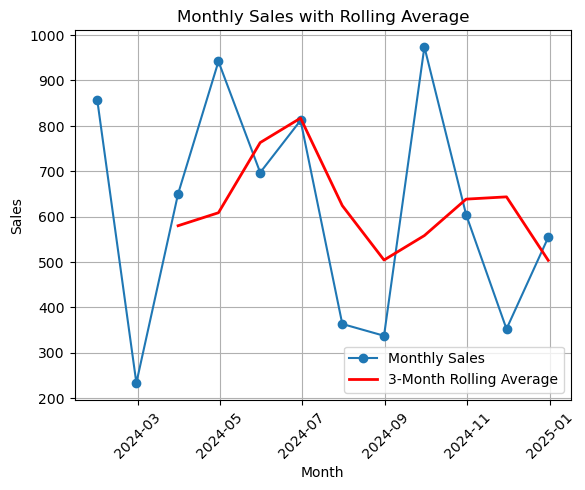

In [75]:
plt.plot(df["Month"], df["Sales"], marker='o', label="Monthly Sales")
plt.plot(df["Month"], df["Rolling_Avg"], color="red", linewidth=2, label="3-Month Rolling Average")

plt.title("Monthly Sales with Rolling Average")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


## 4. Using seaborne tips dataset create a scatter plot with regression line showing the realtionship between total_bill and trip.

In [61]:
import seaborn as sns

tips_data=sns.load_dataset('tips')
tips_data

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


<Axes: xlabel='total_bill', ylabel='tip'>

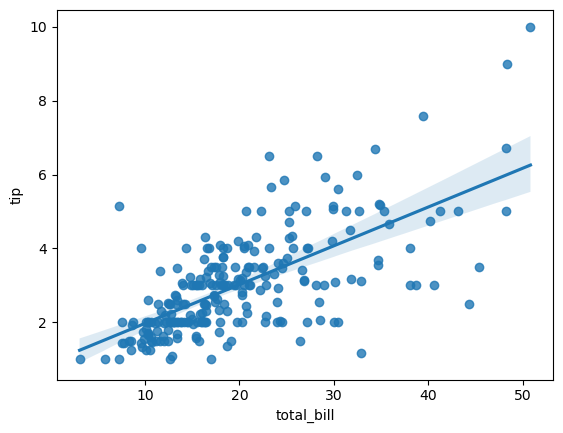

In [74]:
sns.regplot(x=tips_data['total_bill'],y=tips_data['tip'])